In [1]:
from src.utils import *
from src.preprocess import clean_spacy_tokens
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
from functools import reduce

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\subje\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
DOCS_PATH = 'data/en_core_web_lg.jsonl'
MONTHS = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [3]:
docs = read_jsonl(DOCS_PATH)

In [7]:
docs[0]['abstract']

{'text': 'Cabell Calloway III (December 25, 1907 – November 18, 1994) was an American singer, songwriter, bandleader, conductor and dancer. He was associated with the Cotton Club in Harlem, where he was a regular performer and became a popular vocalist of the swing era. His niche of mixing jazz and vaudeville won him acclaim during a career that spanned over 65 years. Calloway was a master of energetic scat singing and led one of the most popular dance bands in the United States from the early 1930s to the late 1940s. His band included trumpeters Dizzy Gillespie, Jonah Jones, and Adolphus "Doc" Cheatham, saxophonists Ben Webster and Leon "Chu" Berry, guitarist Danny Barker, bassist Milt Hinton, and drummer Cozy Cole. Calloway had several hit records in the 1930s and 1940s, becoming known as the "Hi-de-ho" man of jazz for his most famous song, "Minnie the Moocher", originally recorded in 1931. He reached the Billboard charts in five consecutive decades (1930s–1970s). Calloway also made 

In [8]:
df = pd.DataFrame(docs, columns=['path', 'birthDate', 'birthPlace', 'deathDate', 'abstract'])
df.head()

,path,birthDate,birthPlace,deathDate,abstract
0,http://dbpedia.org/resource/Cab_Calloway,1907-12-25,"http://dbpedia.org/resource/Rochester,_New_York",1994-11-18,"{'text': 'Cabell Calloway III (December 25, 19..."
1,http://dbpedia.org/resource/Cabell_Breckinridge,1788-07-14,"http://dbpedia.org/resource/Albemarle_County,_...",1823-09-01,"{'text': 'Joseph ""Cabell"" Breckinridge (July 1..."
2,http://dbpedia.org/resource/Cabeção_(footballer),1930-08-23,http://dbpedia.org/resource/Brazil,2020-01-06,{'text': 'Luís Morais (23 August 1930 – 6 Janu...
3,http://dbpedia.org/resource/Cabiria_Andreian_C...,1928-02-19,http://dbpedia.org/resource/Iași,2018-05-22,{'text': 'Cabiria Andreian Cazacu (February 19...
4,http://dbpedia.org/resource/Cabo_Almi,1962-12-17,http://dbpedia.org/resource/Jardim_Olinda,2021-05-24,{'text': 'José Almi Pereira Moura full name of...


In [5]:
df['tokens'] = [clean_spacy_tokens(doc['abstract']) for doc in docs]
df.head()

,path,birthDate,birthPlace,deathDate,tokens
0,http://dbpedia.org/resource/Cab_Calloway,1907-12-25,"http://dbpedia.org/resource/Rochester,_New_York",1994-11-18,"[Cabell, Calloway, III, December, November, am..."
1,http://dbpedia.org/resource/Cabell_Breckinridge,1788-07-14,"http://dbpedia.org/resource/Albemarle_County,_...",1823-09-01,"[Joseph, Cabell, Breckinridge, July, September..."
2,http://dbpedia.org/resource/Cabeção_(footballer),1930-08-23,http://dbpedia.org/resource/Brazil,2020-01-06,"[Luís, Morais, August, January, know, Cabeção,..."
3,http://dbpedia.org/resource/Cabiria_Andreian_C...,1928-02-19,http://dbpedia.org/resource/Iași,2018-05-22,"[Cabiria, Andreian, Cazacu, February, May, rom..."
4,http://dbpedia.org/resource/Cabo_Almi,1962-12-17,http://dbpedia.org/resource/Jardim_Olinda,2021-05-24,"[José, Almi, Pereira, Moura, full, name, Cabo,..."


In [6]:
df['astral_sign'] = df.birthDate.apply(date_to_astral)
df.head()

,path,birthDate,birthPlace,deathDate,tokens,astral_sign
0,http://dbpedia.org/resource/Cab_Calloway,1907-12-25,"http://dbpedia.org/resource/Rochester,_New_York",1994-11-18,"[Cabell, Calloway, III, December, November, am...",Capricorn
1,http://dbpedia.org/resource/Cabell_Breckinridge,1788-07-14,"http://dbpedia.org/resource/Albemarle_County,_...",1823-09-01,"[Joseph, Cabell, Breckinridge, July, September...",Cancer
2,http://dbpedia.org/resource/Cabeção_(footballer),1930-08-23,http://dbpedia.org/resource/Brazil,2020-01-06,"[Luís, Morais, August, January, know, Cabeção,...",Virgo
3,http://dbpedia.org/resource/Cabiria_Andreian_C...,1928-02-19,http://dbpedia.org/resource/Iași,2018-05-22,"[Cabiria, Andreian, Cazacu, February, May, rom...",Aquarius
4,http://dbpedia.org/resource/Cabo_Almi,1962-12-17,http://dbpedia.org/resource/Jardim_Olinda,2021-05-24,"[José, Almi, Pereira, Moura, full, name, Cabo,...",Sagittarius


words = reduce(lambda a, b: a | set([t.lower() for t in b]), df['tokens'], set())

print(len(vectorizer.vocabulary_), len(features), len(words))

def check(x):
    word = 'apple'
    for t in x:
        if t.lower() == word:
            print(t, x)
_ = df['tokens'].apply(check)

In [15]:
vectorizer = CountVectorizer(lowercase=False, token_pattern=r'([^\s]+)')
X = vectorizer.fit_transform(df['tokens'].apply(lambda x: ' '.join(x)))
features = vectorizer.get_feature_names_out()
freqs = pd.DataFrame(zip(features, np.asarray((X != 0).astype(int).mean(axis=0)).flatten()), columns=['word', 'freq'])
freqs.sort_values('freq', ascending=False)

,word,freq
106463,bear,0.332554
105091,american,0.219793
122394,play,0.191968
125842,serve,0.181670
117368,know,0.173582
...,...,...
56059,Maddo,0.000021
56058,Maddly,0.000021
56056,Maddin,0.000021
56051,Maddala,0.000021


In [29]:
def terms_to_docs(x):
    return np.asarray((x != 0).astype(int).mean(axis=0)).flatten()

vectorizer = CountVectorizer(lowercase=False, token_pattern=r'([^\s]+)')
vectorizer = vectorizer.fit(df['tokens'].apply(lambda x: ' '.join(x)))
features = vectorizer.get_feature_names_out()

X = vectorizer.transform(df['tokens'].apply(lambda x: ' '.join(x)))
X = terms_to_docs(X)
freqs = pd.DataFrame(
    zip(features, X), 
    columns=['word', 'all_freq']    
)

for asign in df['astral_sign'].unique():
    X = vectorizer.transform(df[df['astral_sign'] == asign]['tokens'].apply(lambda x: ' '.join(x)))
    X = terms_to_docs(X)
    freqs[f'{asign}_freq'] = X

freqs.describe()

,all_freq,Capricorn_freq,Cancer_freq,Virgo_freq,Aquarius_freq,Sagittarius_freq,Gemini_freq,Taurus_freq,Aries_freq,Pisces_freq,Libra_freq,Scorpio_freq,Leo_freq
count,139553.000000,139553.000000,139553.000000,139553.000000,139553.000000,139553.000000,139553.000000,139553.000000,139553.000000,139553.000000,139553.000000,139553.000000,139553.000000
mean,0.000241,0.000243,0.000240,0.000249,0.000240,0.000243,0.000244,0.000238,0.000232,0.000241,0.000244,0.000238,0.000243
std,0.002762,0.003187,0.003204,0.003276,0.003170,0.003254,0.003211,0.003179,0.003117,0.003228,0.003263,0.003210,0.003267
min,0.000021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000043,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.332554,0.672962,0.686441,0.701843,0.641824,0.708262,0.653286,0.675676,0.635885,0.686141,0.713482,0.697860,0.717324


In [39]:
freqs[~freqs['word'].isin(MONTHS)].describe()

,all_freq,Capricorn_freq,Cancer_freq,Virgo_freq,Aquarius_freq,Sagittarius_freq,Gemini_freq,Taurus_freq,Aries_freq,Pisces_freq,Libra_freq,Scorpio_freq,Leo_freq
count,139541.000000,139541.000000,139541.000000,139541.000000,139541.000000,139541.000000,139541.000000,139541.000000,139541.000000,139541.000000,139541.000000,139541.000000,139541.000000
mean,0.000228,0.000230,0.000227,0.000236,0.000227,0.000230,0.000231,0.000225,0.000219,0.000228,0.000231,0.000225,0.000230
std,0.002370,0.002357,0.002375,0.002452,0.002353,0.002411,0.002413,0.002349,0.002299,0.002390,0.002403,0.002360,0.002412
min,0.000021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000043,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.332554,0.321301,0.334746,0.341075,0.334641,0.330465,0.339555,0.340596,0.327478,0.322458,0.327258,0.336237,0.335725


In [38]:
for col in freqs.columns:
    print(col, freqs[~freqs['word'].isin(MONTHS)].sort_values(col, ascending=False)['word'][:5].values)

word ['𑢺𑣁𑣌𑣉' '𑢷𑣉𑣔𑣜𑣁' '𑢬𑣉𑣚' '𑢫𑣃𑣜𑣃' 'ﻧﻭﺍﺏ']
all_freq ['bear' 'american' 'play' 'serve' 'know']
Capricorn_freq ['bear' 'american' 'play' 'know' 'serve']
Cancer_freq ['bear' 'american' 'play' 'serve' 'know']
Virgo_freq ['bear' 'american' 'play' 'serve' 'know']
Aquarius_freq ['bear' 'american' 'play' 'know' 'serve']
Sagittarius_freq ['bear' 'american' 'play' 'serve' 'know']
Gemini_freq ['bear' 'american' 'play' 'serve' 'know']
Taurus_freq ['bear' 'american' 'play' 'serve' 'know']
Aries_freq ['bear' 'american' 'play' 'serve' 'know']
Pisces_freq ['bear' 'american' 'play' 'serve' 'know']
Libra_freq ['bear' 'american' 'serve' 'know' 'play']
Scorpio_freq ['bear' 'american' 'play' 'serve' 'know']
Leo_freq ['bear' 'american' 'play' 'serve' 'know']


<AxesSubplot: >

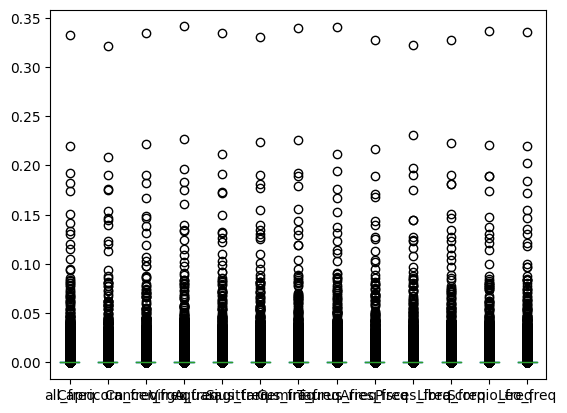

In [69]:
freqs[~freqs['word'].isin(MONTHS)].plot.box()

In [66]:
TARGET = 'bear'
vectorizer = CountVectorizer(lowercase=False, token_pattern=r'([^\s]+)')
X = vectorizer.fit_transform(df['tokens'].apply(lambda x: ' '.join(x)))
features = vectorizer.get_feature_names_out()
tindex = list(features).index(TARGET)
df[(X[:, tindex] == 0).toarray().flatten()]

# freqs = pd.DataFrame(zip(features, np.asarray((X != 0).astype(int).mean(axis=0)).flatten()), columns=['word', 'freq'])
# freqs.sort_values('freq', ascending=False)

c:\Users\pierr\.conda\envs\data-td\lib\site-packages\IPython\core\interactiveshell.py:3442: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


,path,birthDate,birthPlace,deathDate,tokens,astral_sign
0,http://dbpedia.org/resource/Cab_Calloway,1907-12-25,"http://dbpedia.org/resource/Rochester,_New_York",1994-11-18,"[Cabell, Calloway, III, December, November, am...",Capricorn
1,http://dbpedia.org/resource/Cabell_Breckinridge,1788-07-14,"http://dbpedia.org/resource/Albemarle_County,_...",1823-09-01,"[Joseph, Cabell, Breckinridge, July, September...",Cancer
2,http://dbpedia.org/resource/Cabeção_(footballer),1930-08-23,http://dbpedia.org/resource/Brazil,2020-01-06,"[Luís, Morais, August, January, know, Cabeção,...",Virgo
3,http://dbpedia.org/resource/Cabiria_Andreian_C...,1928-02-19,http://dbpedia.org/resource/Iași,2018-05-22,"[Cabiria, Andreian, Cazacu, February, May, rom...",Aquarius
5,http://dbpedia.org/resource/Cabo_Anselmo,1942-02-13,http://dbpedia.org/resource/Itaporanga_d'Ajuda,2022-03-15,"[José, Anselmo, do, Santos, February, March, k...",Aquarius
...,...,...,...,...,...,...
46599,http://dbpedia.org/resource/Miriam_Morandy,1961-10-27,http://dbpedia.org/resource/Maturín,None,"[Miriam, del, Valle, Morandy, Mijares, venezue...",Scorpio
46603,http://dbpedia.org/resource/Thomas_Charles_Munger,1861-07-07,http://dbpedia.org/resource/Ohio,1941-11-29,"[Thomas, Charles, Munger, July, November, Unit...",Cancer
46605,http://dbpedia.org/resource/Ben_Barres,1954-09-13,"http://dbpedia.org/resource/West_Orange,_New_J...",2017-12-27,"[Ben, Barres, September, December, american, n...",Virgo
46609,http://dbpedia.org/resource/Joe_Klugmann,1895-03-26,"http://dbpedia.org/resource/St._Louis,_Missouri",1951-07-18,"[Josie, Joe, Klugmann, March, July, former, pr...",Aries
